# Gender Model

This note we'll build a CNN to classify the gender problem. To build our CNN we'll use [tensorflow](https://www.tensorflow.org/).

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from utils.helpers import unwrapper_data
from sklearn.model_selection import train_test_split
from glob import glob
%matplotlib inline

## Data

In [2]:
DATA_PATH = 'data/'
data = glob(DATA_PATH+'*.gender.pkl')
print(data)

['data/02.gender.pkl', 'data/05.gender.pkl', 'data/03.gender.pkl', 'data/04.gender.pkl', 'data/01.gender.pkl']


## Model

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same', input_shape=(100,100,3)),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 50, 50, 64)        1792      
_________________________________________________________________
batch_normalization_6 (Batch (None, 50, 50, 64)        256       
_________________________________________________________________
activation_6 (Activation)    (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
batch_normalization_7 (Batch (None, 25, 25, 128)       512       
_________________________________________________________________
activation_7 (Activation)    (None, 25, 25, 128)       0         
__________

## Input

In [6]:
X, y = unwrapper_data(data)
mean_x = np.mean(X)
for i, _ in enumerate(X):
    X[i] -= mean_x
print(mean_x)

0.4810395


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20151, 100, 100, 3), (3557, 100, 100, 3), (20151,), (3557,))

## Training

In [8]:
BATCH_SIZE = 64
EPOCHS = 100

In [9]:
list_callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1),
                  tf.keras.callbacks.ModelCheckpoint('models/best_model_gender.hdf5', monitor='val_loss', verbose=1, save_best_only=True)]
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

hist = model.fit(x=X_train, y=y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=list_callbacks, validation_split=0.15)

Train on 17128 samples, validate on 3023 samples
Epoch 1/100
17088/17128 [============================>.] - ETA: 0s - loss: 0.7110 - acc: 0.6563
Epoch 00001: val_loss improved from inf to 0.68880, saving model to models/best_model_gender.hdf5
17128/17128 [==============================] - 238s 14ms/step - loss: 0.7111 - acc: 0.6564 - val_loss: 0.6888 - val_acc: 0.5415
Epoch 2/100
17088/17128 [============================>.] - ETA: 0s - loss: 0.5013 - acc: 0.7483
Epoch 00002: val_loss improved from 0.68880 to 0.35514, saving model to models/best_model_gender.hdf5
17128/17128 [==============================] - 225s 13ms/step - loss: 0.5010 - acc: 0.7484 - val_loss: 0.3551 - val_acc: 0.8277
Epoch 3/100
17088/17128 [============================>.] - ETA: 0s - loss: 0.4455 - acc: 0.7853
Epoch 00003: val_loss improved from 0.35514 to 0.35231, saving model to models/best_model_gender.hdf5
17128/17128 [==============================] - 315s 18ms/step - loss: 0.4456 - acc: 0.7853 - val_loss: 0.

17088/17128 [============================>.] - ETA: 0s - loss: 0.2175 - acc: 0.9087
Epoch 00028: val_loss did not improve from 0.22342
17128/17128 [==============================] - 230s 13ms/step - loss: 0.2176 - acc: 0.9087 - val_loss: 0.2381 - val_acc: 0.9027
Epoch 29/100
17088/17128 [============================>.] - ETA: 0s - loss: 0.2205 - acc: 0.9062
Epoch 00029: val_loss did not improve from 0.22342
17128/17128 [==============================] - 265s 15ms/step - loss: 0.2206 - acc: 0.9061 - val_loss: 0.2296 - val_acc: 0.9100
Epoch 30/100
17088/17128 [============================>.] - ETA: 0s - loss: 0.2124 - acc: 0.9098
Epoch 00030: val_loss did not improve from 0.22342
17128/17128 [==============================] - 364s 21ms/step - loss: 0.2123 - acc: 0.9098 - val_loss: 0.2346 - val_acc: 0.9064
Epoch 31/100
17088/17128 [============================>.] - ETA: 0s - loss: 0.2051 - acc: 0.9142
Epoch 00031: val_loss did not improve from 0.22342
17128/17128 [========================

In [10]:
print('Train =>', model.evaluate(X_train, y_train, verbose=0))
print('Test =>', model.evaluate(X_test, y_test, verbose=0))

Train => [0.08445749979023069, 0.9717135626141838]
Test => [0.2561227085007554, 0.9086308687095868]


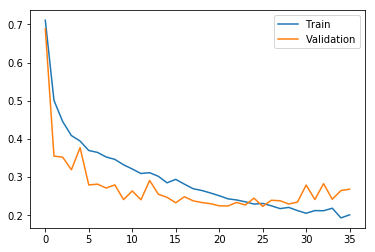

In [11]:
hist_dict = hist.history
loss_val = hist_dict['val_loss']
loss_train = hist_dict['loss']

plt.figure()
plt.plot(loss_train, label='Train')
plt.plot(loss_val, label='Validation')
plt.legend()

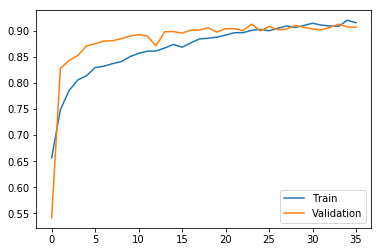

In [12]:
hist_dict = hist.history
acc_val = hist_dict['val_acc']
acc_train = hist_dict['acc']

plt.figure()
plt.plot(acc_train, label='Train')
plt.plot(acc_val, label='Validation')
plt.legend()